In [27]:
using ValueShapes
using ArraysOfArrays
using StatsBase 
using LinearAlgebra
using Statistics
using BAT
using Distributions 
using IntervalSets

using Plots
using Colors
using ColorSchemes
using LaTeXStrings

pyplot(size=(750,500))

Plots.PyPlotBackend()

In [3]:
density_f(x; μ1=-1.5, μ2=1.5, σ=0.5) = (1/2)*(pdf(Normal(μ1, σ),x) + pdf(Normal(μ2, σ),x))

density_f (generic function with 1 method)

In [7]:
prior = NamedTupleDist(x =[-10.0 .. 10.0] )

log_likelihood = let f = density_f
    params ->  LogDVal(log(f(params.x[1])))
end

posterior = PosteriorDensity(log_likelihood, prior)

nsamples = 10^3
nchains = 4

samples = bat_sample(posterior, (nsamples, nchains), MetropolisHastings()).result;

┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /home/iwsatlas1/vhafych/MPP-Project/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:199
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /home/iwsatlas1/vhafych/MPP-Project/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:308
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /home/iwsatlas1/vhafych/MPP-Project/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:72
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 4 converged.
└ @ BAT /home/iwsatlas1/vhafych/MPP-Project/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:104
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 4 tuned, 4 converged.
└ @ BAT /home/iwsatlas1/vhafych/MPP-Project/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:104
┌ Info: MCMC tuning of 4 chains successful after 2 cycle(s).
└ @ BAT /home/iwsatlas1/vhafych/MPP-Project/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:108


In [38]:
samples_flat = flatview(unshaped.(samples.v))[1,:]
bins = range(minimum(samples_flat), stop = maximum(samples_flat), length = 100)
hist = fit(Histogram, samples_flat, weights(samples.weight), bins);
hist = normalize(hist, mode=:pdf);

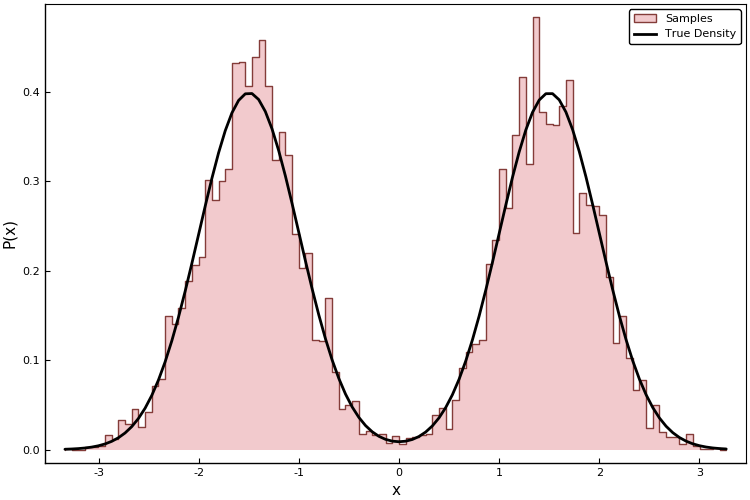

In [47]:
line_colors = ColorSchemes.tab20b

plot(hist, 
    seriestype = :steps, 
    linecolor=line_colors[13], 
    linealpha=1,
    fill=true, 
    fillcolor=line_colors[16],
    fillalpha=0.5, 
    label="Samples"
)

plot!(bins, x->density_f(x), 
    linecolor=:black,
    lw=2, 
    label="True Density")

plot!(grid=:false, frame=true, xlabel="x", ylabel="P(x)")